In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2 
from glob import glob
from astropy.io import fits
from photutils import centroid_sources, centroid_com, centroid_quadratic
import insight as ih

In [2]:
saturn_directory = 'data/saturn/luminance'

In [3]:
saturn_raw_data = ih.multiple_fits(saturn_directory)

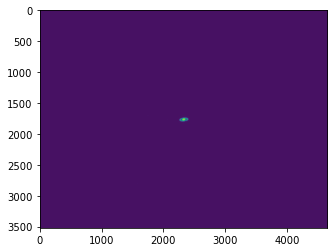

In [4]:
plt.imshow(saturn_raw_data[0])

In [5]:
x0, y0 = centroid_quadratic(saturn_raw_data[0], fit_boxsize = 1000)
print(x0,y0)

2321.3893221169533 1761.2773663240084


In [6]:
centroids_x,centroids_y = ih.calculate_centroids(saturn_raw_data)

In [7]:
xoffset =  -(centroids_x - x0)
yoffset =  -(centroids_y - y0)

In [8]:
lintrans = ih.transformation_matrices(xoffset,yoffset)
lintrans[0]

array([[ 1.        ,  0.        , -3.56666416],
       [ 0.        ,  1.        , -0.28995388]])

In [9]:
rows, cols = saturn_raw_data[0].shape[:2] 

In [10]:
new_saturn_data = ih.image_registration(saturn_raw_data,lintrans,rows,cols)

In [11]:
ref_img = np.array(saturn_raw_data[0])

In [12]:
saturn_centred_data = np.concatenate(([ref_img], new_saturn_data))

In [13]:
saturn_centred_data.shape

(13, 3520, 4656)

In [15]:
#uncomment to get the .fits files
#saturn_centred = 'data/saturn_centred'
#name = 'saturn'
#ih.write_to_fits(saturn_centred,saturn_centred_data,name)